# English Premier League 2020-21 Exploratory Data Analysis

# ANSHUMAN NANDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [22]:
epl = pd.read_csv("EPL_20_21.csv")

In [23]:
epl.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0


Questions:
1. Which team has scored the highest goals?
2. Which team has the highest assists?
3. Which team highest yellow and red cards?
4. Which team has highest passes completed percentage?
5. Which team has converted the penalty attempted to penalty goals?
6. Which team has the eldest and youngest player in them?
7. Find the average players' age of each team?


# These questions are just reference to how you can approach to the dataset.

# Lets start with Fouls and Cards

In [24]:
epl['Total_cards']=epl['Yellow_Cards']+epl['Red_Cards']

In [25]:
epl['Total_cards'].unique()

array([ 2,  3,  6,  7,  4,  0,  1,  5, 11,  8,  9, 10, 12], dtype=int64)

In [26]:
epl.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,Total_cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0,2
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0,2
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0,2
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0,3
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0,3


In [31]:
agg_clubs_foul= epl.groupby('Total_cards')['Club'].value_counts()

In [32]:
agg_clubs_foul.head()

Total_cards  Club                
0            Arsenal                 12
             Brighton                12
             Manchester United       11
             West Bromwich Albion    11
             Everton                 10
Name: Club, dtype: int64

<AxesSubplot:xlabel='Total_cards,Club'>

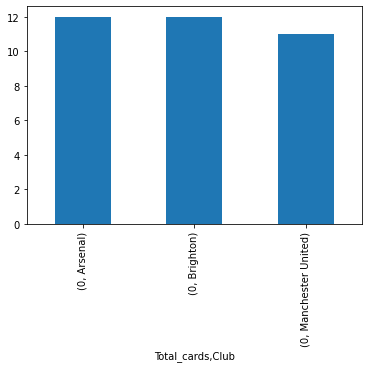

In [45]:
#plotting the bar chart
agg_clubs_foul[:3].plot(kind='bar')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Chelsea'),
  Text(1, 0, 'Manchester City'),
  Text(2, 0, 'Manchester United'),
  Text(3, 0, 'Liverpool FC'),
  Text(4, 0, 'Leicester City'),
  Text(5, 0, 'West Ham United'),
  Text(6, 0, 'Tottenham Hotspur'),
  Text(7, 0, 'Arsenal'),
  Text(8, 0, 'Leeds United'),
  Text(9, 0, 'Everton'),
  Text(10, 0, 'Aston Villa'),
  Text(11, 0, 'Newcastle United'),
  Text(12, 0, 'Wolverhampton Wanderers'),
  Text(13, 0, 'Crystal Palace'),
  Text(14, 0, 'Southampton'),
  Text(15, 0, 'Brighton'),
  Text(16, 0, 'Burnley'),
  Text(17, 0, 'Fulham'),
  Text(18, 0, 'West Bromwich Albion'),
  Text(19, 0, 'Sheffield United')])

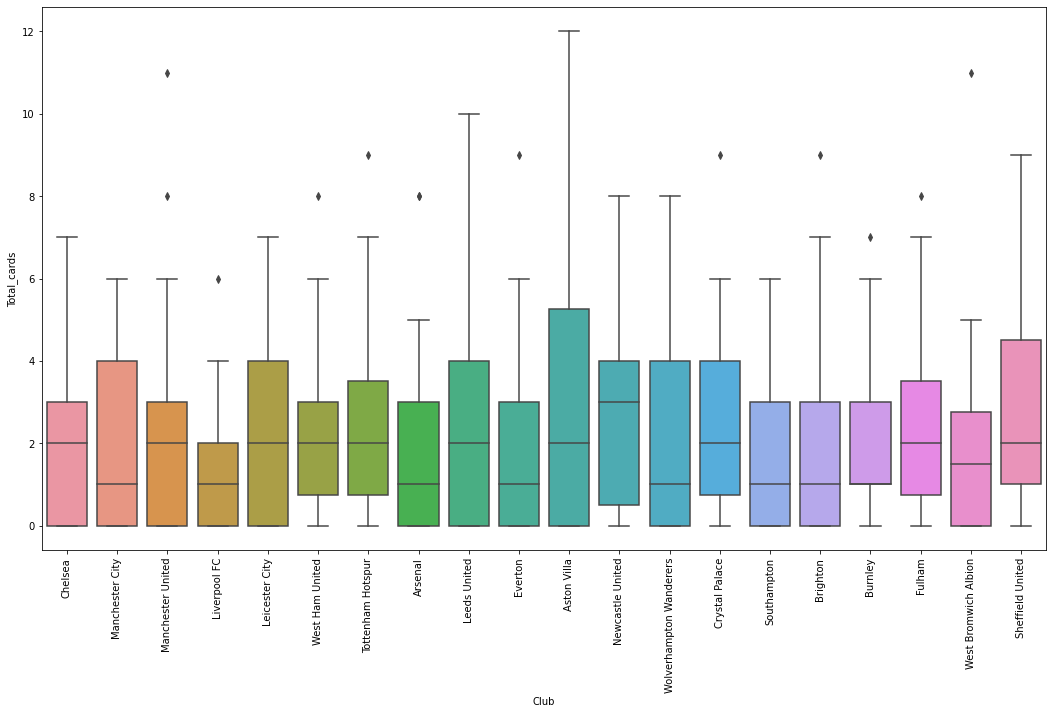

In [58]:
plt.figure(figsize=(18,10))
sns.boxplot(y="Total_cards", x = "Club", data = epl)
plt.xticks(rotation=90)

As we can clearly see for the above boxplot that Aston Villa has the highest no of total cards by a single person, folowed by Leeds United.

Exploring Aston Villa total cards:

In [60]:
aston_villa = epl[epl['Club']=='Aston Villa']

In [61]:
aston_villa.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,Total_cards
264,Emiliano Martínez,Aston Villa,ARG,GK,27,38,38,3420,0,0,1295,65.6,0,0,0.00,0.01,1,0,1
265,Matt Targett,Aston Villa,ENG,DF,24,38,38,3404,0,2,2147,77.0,0,0,0.01,0.08,7,0,7
266,John McGinn,Aston Villa,SCO,MF,25,37,37,3330,3,5,1398,77.3,0,0,0.06,0.08,12,0,12
267,Ollie Watkins,Aston Villa,ENG,FW,24,37,37,3328,14,5,832,72.8,1,2,0.43,0.11,4,1,5
268,Tyrone Mings,Aston Villa,ENG,DF,27,36,36,3194,2,2,1585,79.6,0,0,0.05,0.02,6,1,7


In [62]:
aston_villa[aston_villa['Total_cards']==aston_villa['Total_cards'].max()]

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,Total_cards
266,John McGinn,Aston Villa,SCO,MF,25,37,37,3330,3,5,1398,77.3,0,0,0.06,0.08,12,0,12


In [64]:
aston_villa.describe()

,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,Total_cards
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,24.291667,21.208333,17.416667,1563.833333,2.166667,1.583333,689.833333,76.795833,0.208333,0.250000,0.136667,0.085000,2.958333,0.166667,3.125000
std,3.665102,13.679496,14.887744,1306.292020,3.619592,2.518051,618.349744,9.990930,0.832971,0.896854,0.140980,0.097802,3.470110,0.380693,3.686786
min,16.000000,1.000000,0.000000,1.000000,0.000000,0.000000,4.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,8.500000,3.000000,289.750000,0.000000,0.000000,159.500000,72.400000,0.000000,0.000000,0.010000,0.007500,0.000000,0.000000,0.000000
50%,24.500000,23.000000,14.500000,1348.500000,0.500000,0.500000,603.500000,77.150000,0.000000,0.000000,0.065000,0.060000,2.000000,0.000000,2.000000
75%,26.000000,36.000000,32.750000,2884.250000,2.250000,2.000000,1256.750000,81.950000,0.000000,0.000000,0.212500,0.130000,4.500000,0.000000,5.250000
max,32.000000,38.000000,38.000000,3420.000000,14.000000,10.000000,2147.000000,100.000000,4.000000,4.000000,0.450000,0.350000,12.000000,1.000000,12.000000


# John McGinn is the player who has received the highest number of cards in the EPL 20-21

# Lets look into highest goals

In [65]:
epl.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,Total_cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0,2
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0,2
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0,2
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0,3
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0,3


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Chelsea'),
  Text(1, 0, 'Manchester City'),
  Text(2, 0, 'Manchester United'),
  Text(3, 0, 'Liverpool FC'),
  Text(4, 0, 'Leicester City'),
  Text(5, 0, 'West Ham United'),
  Text(6, 0, 'Tottenham Hotspur'),
  Text(7, 0, 'Arsenal'),
  Text(8, 0, 'Leeds United'),
  Text(9, 0, 'Everton'),
  Text(10, 0, 'Aston Villa'),
  Text(11, 0, 'Newcastle United'),
  Text(12, 0, 'Wolverhampton Wanderers'),
  Text(13, 0, 'Crystal Palace'),
  Text(14, 0, 'Southampton'),
  Text(15, 0, 'Brighton'),
  Text(16, 0, 'Burnley'),
  Text(17, 0, 'Fulham'),
  Text(18, 0, 'West Bromwich Albion'),
  Text(19, 0, 'Sheffield United')])

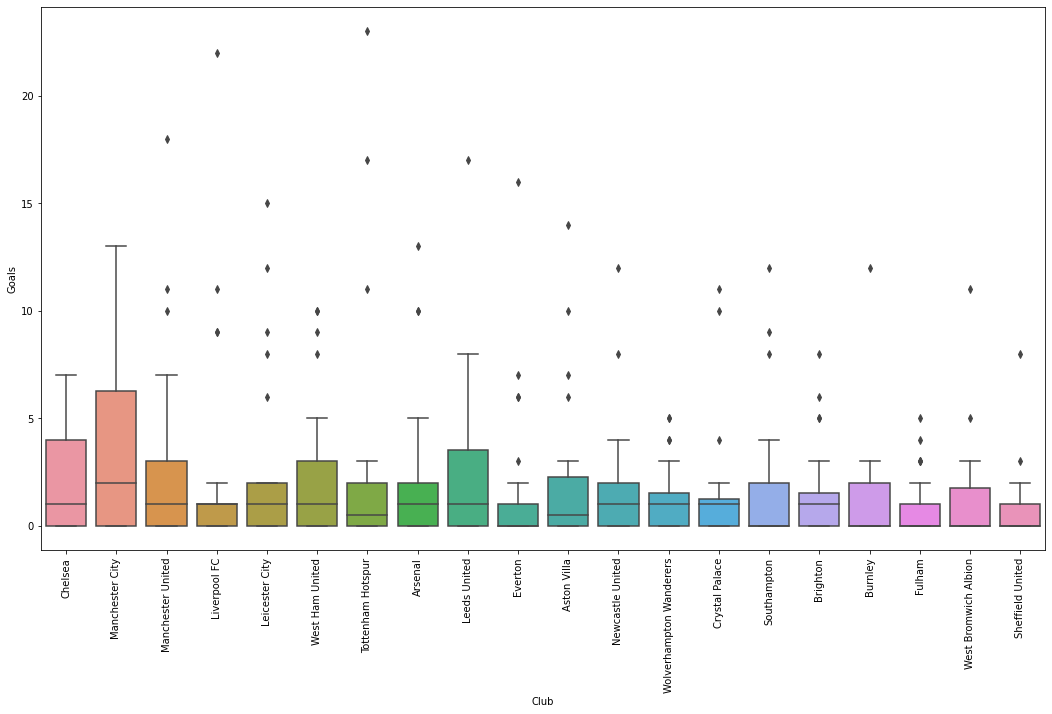

In [74]:
plt.figure(figsize = (18,10))
sns.boxplot(x='Club', y='Goals', data=epl)
plt.xticks(rotation = 90)

# MANCHESTER CITY has scored the highest goals in the EPL 20-21 season followed by CHELSEA.

In [66]:
epl['Goals'].value_counts()

0     261
1     111
2      50
3      27
4      15
6      10
5       9
9       8
8       8
10      8
7       6
11      5
12      4
13      2
17      2
22      1
14      1
15      1
16      1
18      1
23      1
Name: Goals, dtype: int64

In [68]:
highest_goal_scorer = epl[epl['Goals']== 23]

In [69]:
highest_goal_scorer

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,Total_cards
162,Harry Kane,Tottenham Hotspur,ENG,FW,27,35,35,3082,23,14,937,70.1,4,4,0.6,0.22,1,0,1


# HARRY KANE is the highest goal scorer for the 20-21 EPL season.

# Let's check the top 3 players with most number of goals.

In [77]:
top_3_goal_scorers = epl.sort_values(ascending = False, by = 'Goals')[:3]

In [78]:
top_3_goal_scorers

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,Total_cards
162,Harry Kane,Tottenham Hotspur,ENG,FW,27,35,35,3082,23,14,937,70.1,4,4,0.60,0.22,1,0,1
81,Mohamed Salah,Liverpool FC,EGY,FW,28,37,34,3078,22,5,1288,83.2,6,6,0.61,0.18,0,0,0
51,Bruno Fernandes,Manchester United,POR,MF,25,37,35,3099,18,12,2283,74.6,9,10,0.45,0.32,6,0,6


<AxesSubplot:xlabel='Name'>

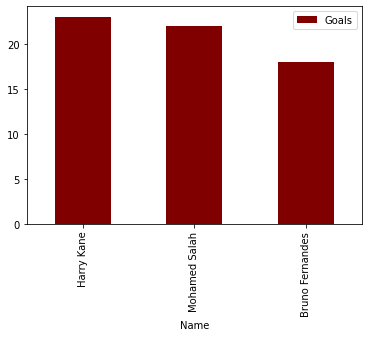

In [89]:
top_3_goal_scorers.plot(x='Name', y='Goals', kind='bar', legend = True, color = 'maroon')

# Analysis related to penalty:

<AxesSubplot:xlabel='Penalty_Goals', ylabel='Penalty_Attempted'>

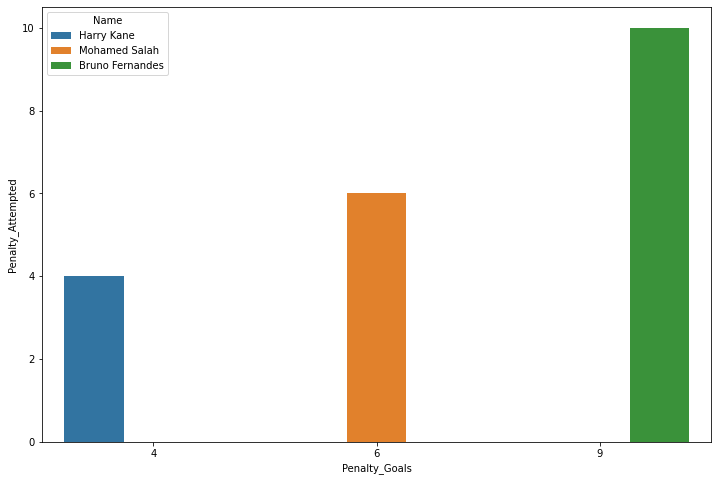

In [92]:
plt.figure(figsize=(12,8))
sns.barplot(x='Penalty_Goals',y='Penalty_Attempted',hue='Name',data=top_3_goal_scorers)

<AxesSubplot:xlabel='Name', ylabel='Passes_Attempted'>

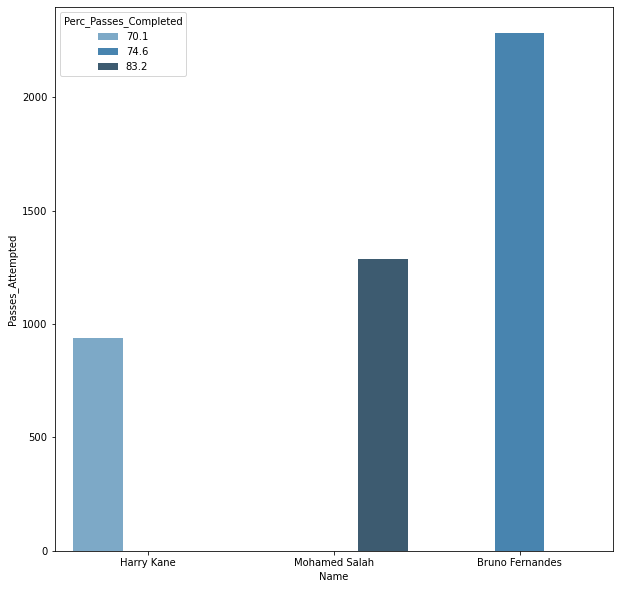

In [106]:
plt.figure(figsize = (10,10))
sns.barplot(x='Name', y='Passes_Attempted', data= top_3_goal_scorers, hue='Perc_Passes_Completed', palette = 'Blues_d')

# Most Passes Attempted VS Passes Completed player is Md Salah with above 80% attempts and delivered

# So, in terms of Players.. Tottenham Hotspur, Liverpool and Man Utd dominated the EPL in 2020-2021 season

In [107]:
epl.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,Total_cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0,2
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0,2
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0,2
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0,3
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0,3


In [108]:
less_time_played_on_field = epl.sort_values(by = 'Mins')[:3]

In [109]:
less_time_played_on_field

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,Total_cards
531,Femi Seriki,Sheffield United,ENG,DF,17,1,0,1,0,0,0,-1.0,0,0,0.0,0.0,0,0,0
79,William Thomas Fish,Manchester United,ENG,DF,17,1,0,1,0,0,1,0.0,0,0,0.0,0.0,0,0,0
287,Jaden Philogene Bidace,Aston Villa,ENG,FW,18,1,0,1,0,0,4,50.0,0,0,0.0,0.0,0,0,0


# As we can see from the above data that, the players have played for 1 minute with 0 Passes_attempted or maximum of 4 passes_attempted. They might have injured themselves or the Manager was having another plan for them.

# BEST GOALKEEPER

In [114]:
GK=epl.where(epl['Position']=='GK')

In [116]:
GK.dropna(inplace=True)

In [118]:
GK

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,Total_cards
1,Edouard Mendy,Chelsea,SEN,GK,28.0,31.0,31.0,2745.0,0.0,0.0,1007.0,84.6,0.0,0.0,0.0,0.00,2.0,0.0,2.0
20,Kepa Arrizabalaga,Chelsea,ESP,GK,25.0,7.0,6.0,585.0,0.0,0.0,243.0,81.5,0.0,0.0,0.0,0.00,1.0,0.0,1.0
22,Willy Caballero,Chelsea,ARG,GK,38.0,1.0,1.0,90.0,0.0,0.0,26.0,92.3,0.0,0.0,0.0,0.00,0.0,0.0,0.0
27,Ederson,Manchester City,BRA,GK,26.0,36.0,36.0,3240.0,0.0,1.0,1090.0,83.1,0.0,0.0,0.0,0.01,3.0,0.0,3.0
48,Scott Carson,Manchester City,ENG,GK,34.0,1.0,1.0,90.0,0.0,0.0,16.0,93.8,0.0,0.0,0.0,0.00,0.0,0.0,0.0
49,Zack Steffen,Manchester City,USA,GK,25.0,1.0,1.0,90.0,0.0,0.0,28.0,82.1,0.0,0.0,0.0,0.00,0.0,0.0,0.0
58,David de Gea,Manchester United,ESP,GK,29.0,26.0,26.0,2295.0,0.0,0.0,594.0,77.1,0.0,0.0,0.0,0.00,0.0,0.0,0.0
64,Dean Henderson,Manchester United,ENG,GK,23.0,13.0,12.0,1125.0,0.0,0.0,314.0,75.2,0.0,0.0,0.0,0.00,3.0,0.0,3.0
84,Alisson,Liverpool FC,BRA,GK,27.0,33.0,33.0,2970.0,1.0,0.0,1137.0,85.2,0.0,0.0,0.0,0.00,1.0,0.0,1.0
101,Adrián,Liverpool FC,ESP,GK,33.0,3.0,3.0,270.0,0.0,0.0,99.0,76.8,0.0,0.0,0.0,0.00,0.0,0.0,0.0


# Can a GK get a yellow or red card?

In [137]:
GK_maximum_cards = GK[GK['Total_cards']==GK['Total_cards'].max()]

In [138]:
GK_maximum_cards

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,Total_cards
27,Ederson,Manchester City,BRA,GK,26.0,36.0,36.0,3240.0,0.0,1.0,1090.0,83.1,0.0,0.0,0.0,0.01,3.0,0.0,3.0
64,Dean Henderson,Manchester United,ENG,GK,23.0,13.0,12.0,1125.0,0.0,0.0,314.0,75.2,0.0,0.0,0.0,0.00,3.0,0.0,3.0
290,Karl Darlow,Newcastle United,ENG,GK,29.0,25.0,25.0,2250.0,0.0,0.0,726.0,50.1,0.0,0.0,0.0,0.00,3.0,0.0,3.0


<AxesSubplot:xlabel='Name'>

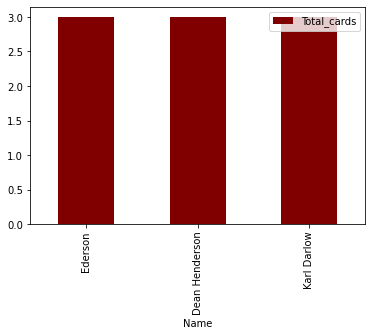

In [141]:
GK_maximum_cards.plot(x='Name',y='Total_cards',kind='bar', color='maroon')

# MAXIMUM pass %

In [142]:
GK[GK['Perc_Passes_Completed']==GK['Perc_Passes_Completed'].max()]

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,Total_cards
48,Scott Carson,Manchester City,ENG,GK,34.0,1.0,1.0,90.0,0.0,0.0,16.0,93.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# IF any GK has scored?

In [143]:
GK[GK['Goals']==GK['Goals'].max()]

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,Total_cards
84,Alisson,Liverpool FC,BRA,GK,27.0,33.0,33.0,2970.0,1.0,0.0,1137.0,85.2,0.0,0.0,0.0,0.0,1.0,0.0,1.0


# IF GK has any assists?

In [144]:
GK[GK['Assists']==GK['Assists'].max()]

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,Total_cards
27,Ederson,Manchester City,BRA,GK,26.0,36.0,36.0,3240.0,0.0,1.0,1090.0,83.1,0.0,0.0,0.0,0.01,3.0,0.0,3.0
475,Sam Johnstone,West Bromwich Albion,ENG,GK,27.0,37.0,37.0,3330.0,0.0,1.0,1282.0,49.9,0.0,0.0,0.0,0.01,1.0,0.0,1.0


# MIDFIELDERS>>>

In [146]:
epl.loc[epl['Position'].str.contains('MF'), 'Position'] = 'MF' 

In [147]:
Mf_players=epl.where(epl['Position']=='MF')


In [148]:
Mf_players

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,Total_cards
0,Mason Mount,Chelsea,ENG,MF,21.0,36.0,32.0,2890.0,6.0,5.0,1881.0,82.3,1.0,1.0,0.21,0.24,2.0,0.0,2.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,Lys Mousset,Sheffield United,FRA,MF,24.0,11.0,2.0,296.0,0.0,0.0,50.0,80.0,0.0,0.0,0.22,0.10,0.0,0.0,0.0
528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
529,Iliman Ndiaye,Sheffield United,FRA,MF,21.0,1.0,0.0,12.0,0.0,0.0,3.0,100.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0
530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [150]:
Mf_players.dropna(inplace=True)

In [151]:
Mf_players

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,Total_cards
0,Mason Mount,Chelsea,ENG,MF,21.0,36.0,32.0,2890.0,6.0,5.0,1881.0,82.3,1.0,1.0,0.21,0.24,2.0,0.0,2.0
6,N'Golo Kanté,Chelsea,FRA,MF,29.0,30.0,24.0,2146.0,0.0,2.0,1504.0,86.6,0.0,0.0,0.04,0.05,7.0,0.0,7.0
7,Jorginho,Chelsea,ITA,MF,28.0,28.0,23.0,2010.0,7.0,1.0,1739.0,89.5,7.0,9.0,0.31,0.09,2.0,0.0,2.0
10,Mateo Kovačić,Chelsea,CRO,MF,26.0,27.0,21.0,1815.0,0.0,1.0,1737.0,91.0,0.0,0.0,0.05,0.09,4.0,0.0,4.0
12,Christian Pulisic,Chelsea,USA,MF,21.0,27.0,18.0,1738.0,4.0,2.0,690.0,80.0,0.0,0.0,0.28,0.14,2.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,John Lundstram,Sheffield United,ENG,MF,26.0,28.0,23.0,2032.0,0.0,2.0,1041.0,81.0,0.0,1.0,0.09,0.05,8.0,1.0,9.0
515,Ben Osborn,Sheffield United,ENG,MF,25.0,24.0,17.0,1604.0,1.0,0.0,839.0,79.0,0.0,0.0,0.07,0.12,1.0,0.0,1.0
517,Sander Berge,Sheffield United,NOR,MF,22.0,15.0,13.0,1120.0,1.0,1.0,464.0,81.9,1.0,1.0,0.10,0.10,4.0,0.0,4.0
527,Lys Mousset,Sheffield United,FRA,MF,24.0,11.0,2.0,296.0,0.0,0.0,50.0,80.0,0.0,0.0,0.22,0.10,0.0,0.0,0.0


In [152]:
Mf_players[Mf_players['Goals']==Mf_players['Goals'].max()]

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,Total_cards
51,Bruno Fernandes,Manchester United,POR,MF,25.0,37.0,35.0,3099.0,18.0,12.0,2283.0,74.6,9.0,10.0,0.45,0.32,6.0,0.0,6.0


# BRUNO FERNANDES from MANCHESTER UNITED has the highest score among the Midfielders

# Highest Assist?

In [153]:
Mf_players[Mf_players['Assists']==Mf_players['Assists'].max()]

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,Total_cards
34,Kevin De Bruyne,Manchester City,BEL,MF,29.0,25.0,23.0,1997.0,6.0,12.0,1406.0,76.0,2.0,3.0,0.44,0.46,1.0,0.0,1.0
51,Bruno Fernandes,Manchester United,POR,MF,25.0,37.0,35.0,3099.0,18.0,12.0,2283.0,74.6,9.0,10.0,0.45,0.32,6.0,0.0,6.0


# Highest Passes Attempted and Passes completed percentage?

In [155]:
Mf_players[Mf_players['Passes_Attempted']==Mf_players['Passes_Attempted'].max()]

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,Total_cards
29,Rodri,Manchester City,ESP,MF,24.0,34.0,31.0,2748.0,2.0,2.0,2728.0,91.5,1.0,1.0,0.08,0.06,6.0,0.0,6.0


In [156]:
Mf_players[Mf_players['Perc_Passes_Completed']==Mf_players['Perc_Passes_Completed'].max()]

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,Total_cards
78,Hannibal Mejbri,Manchester United,FRA,MF,17.0,1.0,0.0,9.0,0.0,0.0,3.0,100.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
263,Nathan Broadhead,Everton,WAL,MF,22.0,1.0,0.0,3.0,0.0,0.0,2.0,100.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
285,Wesley Moraes,Aston Villa,BRA,MF,23.0,3.0,0.0,18.0,0.0,0.0,4.0,100.0,0.0,0.0,0.12,0.0,0.0,0.0,0.0
314,Elliot Anderson,Newcastle United,SCO,MF,17.0,1.0,0.0,4.0,0.0,0.0,1.0,100.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
529,Iliman Ndiaye,Sheffield United,FRA,MF,21.0,1.0,0.0,12.0,0.0,0.0,3.0,100.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0


# The above data is not clear because the MF players have hardly done any Passes_attempted, so the output is 100%


In [158]:
Mf_players['Actual_passes_completed']=((Mf_players['Perc_Passes_Completed']/100)*Mf_players['Passes_Attempted'])

In [159]:
Mf_players.groupby('Actual_passes_completed')['Name','Club'].sum()


<ipython-input-159-4adb5bdbf691>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Mf_players.groupby('Actual_passes_completed')['Name','Club'].sum()


,Name,Club
Actual_passes_completed,,
0.000,Jayson MolumbyLewis Richardson,BrightonBurnley
1.000,Elliot Anderson,Newcastle United
2.000,Nathan Broadhead,Everton
2.001,Alexandre Jankewitz,Southampton
3.000,Hannibal MejbriIliman Ndiaye,Manchester UnitedSheffield United
...,...,...
1945.436,Granit Xhaka,Arsenal
2011.374,Youri Tielemans,Leicester City
2116.152,James Ward-Prowse,Southampton


In [160]:
Mf_players.sort_values(ascending=False,by='Actual_passes_completed')

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,Total_cards,Actual_passes_completed
29,Rodri,Manchester City,ESP,MF,24.0,34.0,31.0,2748.0,2.0,2.0,2728.0,91.5,1.0,1.0,0.08,0.06,6.0,0.0,6.0,2496.120
159,Pierre Højbjerg,Tottenham Hotspur,DEN,MF,24.0,38.0,38.0,3420.0,2.0,4.0,2687.0,88.9,0.0,0.0,0.03,0.05,9.0,0.0,9.0,2388.743
366,James Ward-Prowse,Southampton,ENG,MF,25.0,38.0,38.0,3420.0,8.0,7.0,2619.0,80.8,3.0,4.0,0.14,0.11,5.0,0.0,5.0,2116.152
109,Youri Tielemans,Leicester City,BEL,MF,23.0,38.0,37.0,3357.0,6.0,4.0,2559.0,78.6,2.0,2.0,0.12,0.09,6.0,0.0,6.0,2011.374
185,Granit Xhaka,Arsenal,SUI,MF,27.0,31.0,29.0,2522.0,1.0,2.0,2164.0,89.9,0.0,0.0,0.03,0.06,7.0,1.0,8.0,1945.436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,Alexandre Jankewitz,Southampton,SUI,MF,18.0,2.0,1.0,3.0,0.0,0.0,3.0,66.7,0.0,0.0,0.00,0.00,0.0,1.0,1.0,2.001
263,Nathan Broadhead,Everton,WAL,MF,22.0,1.0,0.0,3.0,0.0,0.0,2.0,100.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,2.000
314,Elliot Anderson,Newcastle United,SCO,MF,17.0,1.0,0.0,4.0,0.0,0.0,1.0,100.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,1.000
446,Lewis Richardson,Burnley,ENG,MF,17.0,2.0,0.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.000


<AxesSubplot:xlabel='Name'>

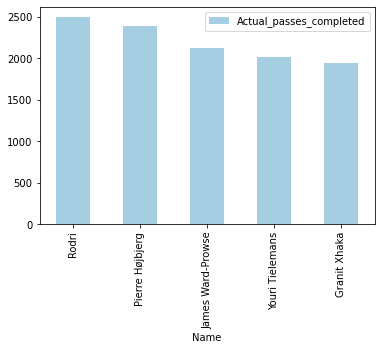

In [161]:
Mf_players.sort_values(ascending=False,by='Actual_passes_completed')[:5].plot(kind='bar',x='Name',y='Actual_passes_completed',cmap='Paired')

<AxesSubplot:xlabel='Name'>

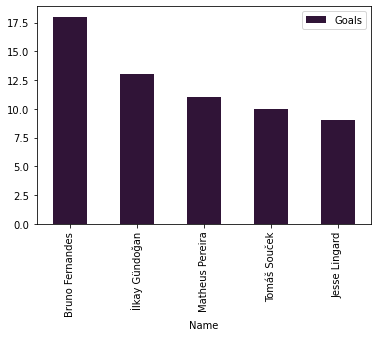

In [162]:
Mf_players.sort_values(ascending=False,by='Goals')[:5].plot(kind='bar',x='Name',y='Goals',cmap='twilight_shifted')

<AxesSubplot:xlabel='Name'>

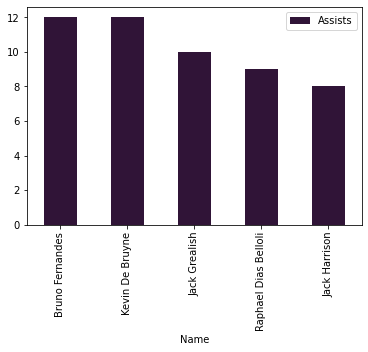

In [163]:
Mf_players.sort_values(ascending=False,by='Assists')[:5].plot(kind='bar',x='Name',y='Assists',cmap='twilight_shifted')

# Bruno Fernandes and KV DeBruyene have the most number of assists. Shared for Midfield Position

In [164]:
epl['goals_permatch']=(epl['Goals']/epl['Matches'])
most_goals_permatch=epl['goals_permatch'].groupby(epl['Club']).sum().sort_values(ascending=False)

<AxesSubplot:xlabel='Club'>

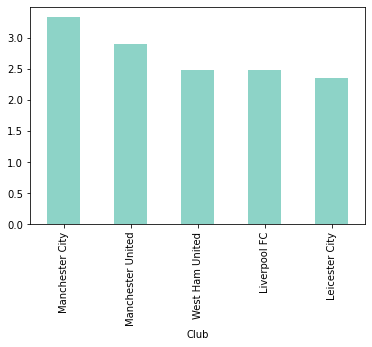

In [165]:
most_goals_permatch.nlargest(5).plot(kind='bar',cmap='Set3')

# Manchester City has the highest Goals per Match ratio in EPL 2020-2021

# SUMMARY:

The most number of Goals scored by a player : Harry Kane The most number of Assists by a player overall: Harry Kane The most number of Goals scored by a midfielder: Bruno Fernandes The most number of Goals scored by a midfielder : Bruno Fernandes and KV D Bruyne The most number of Goals scored by an EPL Team : Manchester City The most number of Goals scored by an EPL Team: Manchester City Most number of Cards shown : N Kante, Chelsea Defender with the most number of Cards: John McGinn, Aston Villa Teams with most number of Cards(Red/Yellow): Arsenal and Brighton Player with most number of Passes Completed in the season: Rodri, Man City.

# THANK YOU